# 1st Part- Calculating Metrics

## Requirements: 
1. GraphViz (on your system and as a python package)
2. cv2 (OpenCV)
3. networkx
4. numpy
5. pandas
6. matplotlib (but it is not required, you can skip that part)

In [1]:
import networkx as nx
import numpy as np
import pandas as pd

data = pd.read_csv('multiverse-mx.csv')
idx,idy = data.shape
G = nx.DiGraph() 
i = 0 
while (i < idx):
    source = data['Infector'][i]
    target = data['Susceptible'][i]
    gen = data['gen'][i]
    G.add_edge(source,target, weight =gen )
    i +=1
#### Finding the roots
roots = []
leaves = []
for node in G: 
    if G.in_degree(node)==0:
        roots.append(node)
    if (G.out_degree(node)==0):
        leaves.append(node)

print("The Roots are:",roots)

print("The leaves are:",leaves)

print("The number of leaves is: ", len(leaves))

longest_root = -1
longest_leaf = -1
max_path_length = 0
for node in roots:
    length = nx.single_source_shortest_path_length(G,node)
    max_dist = max(length.values())
    if (max_dist > max_path_length):
        max_path_length = max_dist
        longest_root = node
        longest_leaf = max(length,key = length.get)
print("The longest path is: ", max_path_length, " between ", longest_root , " And ", longest_leaf)
for ll in nx.all_simple_paths(G, source=longest_root, target=longest_leaf):
    print(ll)
    longest_path=ll
avg_path = 0

for node in roots:
    s = nx.single_source_shortest_path_length(G,node)
    for l in leaves:
        if l in s:
            avg_path += s.get(l)

print("The average path is: ",avg_path/len(leaves))
            

The Roots are: [10]
The leaves are: [29, 0, 23, 34, 30, 45, 54, 1, 64, 53, 85, 12, 8, 81, 87, 19, 98, 96, 49, 65]
The number of leaves is:  20
The longest path is:  7  between  10  And  49
[10, 37, 82, 44, 9, 51, 11, 49]
The average path is:  5.4


### Calculating Q (Can be skipped)

In [2]:
avgD = avg_path/len(leaves)
print(avgD)
# print(len(leaves)/)
Gen = data['gen'].max()
Q = len(leaves)/avgD/Gen * (len(G.nodes)-1) * 100
print("The value of Q is: ",Q)
print(len(G.nodes)-1)

5.4
The value of Q is:  16.484287317620648
47


### Plotting The degree Distribution

The average out-degree is:  1.7142857142857142


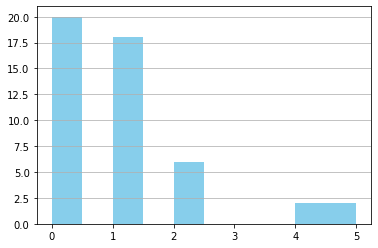

In [3]:
import matplotlib.pyplot as plt
import networkx as nx
degrees = [G.out_degree(n) for n in G.nodes()]
print("The average out-degree is: ", sum(degrees)/(len(G.nodes) - len(leaves)))
plt.hist(degrees,color = "skyblue")
plt.grid(axis='y', alpha=0.95)
plt.show()

## Showing the nodes in each depth

In [4]:
depth_nodes = {}
for node in roots:
    s = nx.single_source_shortest_path_length(G,node)
    for key,value in s.items():
        in_edge = G.in_edges(key)
        if (value in depth_nodes):
            temp = depth_nodes.get(value)
            c = np.array(temp)
            c = np.append(c,key)
            depth_nodes[value] = c
        else:
            depth_nodes[value] = key

for key in depth_nodes:
    print("The nodes in depth",key,": ", depth_nodes.get(key), " The size is: ", np.size(depth_nodes.get(key)))

The nodes in depth 0 :  10  The size is:  1
The nodes in depth 1 :  [37 78]  The size is:  2
The nodes in depth 2 :  [82  3]  The size is:  2
The nodes in depth 3 :  [58 44  6 47]  The size is:  4
The nodes in depth 4 :  [33  7 72 41  9 39 15 16 22 57 60 29]  The size is:  12
The nodes in depth 5 :  [64  1 65  0 34 38 70 12 45 81 83 51 53 84 23 54 93 95]  The size is:  18
The nodes in depth 6 :  [96 98  8 11 19 85 87 30]  The size is:  8
The nodes in depth 7 :  49  The size is:  1


### Analyzing the number of infections and time of the multiverse cases should be done in the cell below

In [23]:
##### Multiverse and Time Analysis should be done in this cell

## Creating the level-gen table (Can be skipped)

### its name is level_gen_table

In [5]:
level_gen_table = {}
for node in roots:
    s = nx.single_source_shortest_path_length(G,node)
    for key,value in s.items():
        in_edge = G.in_edges(key)
        vvvalue = -1
        for u,v in in_edge:
            vvvalue = G.edges[u,v]["weight"]
            if (value in level_gen_table):
                temp = level_gen_table.get(value)
                c = np.array(temp)
                c = np.append(c,vvvalue)
                level_gen_table[value] = c
            else:
                level_gen_table[value] = vvvalue


# 2nd Step, Visualization
## 1st step create a separate png file for each change

In [ ]:
%time
import pandas as pd
import numpy as np
import sys
import pydot
from graphviz import Digraph
from subprocess import check_call
import graphviz


data = pd.read_csv('multiverse-mx.csv')
idx,idy = data.shape
df1 = data.sort_values(by=['gen'],ignore_index=False)
m = max(data['Infector'].max(), data['Susceptible'].max())
U = np.array(range(0,m+1))
for i in range(0,m+1):
    U[i] = -1
df1.to_csv("ordered_multiverse.csv",index=False)



gra = Digraph(strict=True)
e = []
i=0
data = pd.read_csv("ordered_multiverse.csv")
num_of_universe = len(data.U.unique())
while(i < idx):
    source = data['Infector'][i]
    target = data['Susceptible'][i]
    source_name = "A"+str(source)
    target_name = "A"+str(target)
    gen = data['gen'][i]
    gra.node(str(source_name),color='grey',style='filled')
    gra.node(str(target_name),color='grey',style='filled')
    gra.edge(str(source_name), str(target_name),color='grey', label=str(gen))
    i +=1
gra.render(filename='multiverse/_1.dot')
path = "multiverse/_1.dot"
output = "multiverse/_1" + ".png"
check_call(['dot','-Tpng',path,'-o',output])



colors = ["red","cyan", "orange", "bisque4", "yellow", "khaki","purple","green","salmon" ]
i=0
gen_curr = 0
png_idx = 0
nodes = []


while(i <idx):
    source = data['Infector'][i]
    target = data['Susceptible'][i]
    gen = data['gen'][i]
    U = data['U'][i]
    source_name = "A"+str(source)
    target_name = "A"+str(target)
    if (gen==gen_curr):
        gra.edge(source_name, target_name,color=colors[U],label=str(gen))
        if (source in longest_path):
            gra.node(source_name,color='magenta',style='filled')
        else:
            gra.node(source_name,color=colors[U],style='filled')
            nodes.append(source_name)
        if (target in longest_path):
            gra.node(target_name,color='magenta',style='filled')
        else:
            gra.node(target_name,color=colors[U],style='filled')
            nodes.append(target_name)
        i +=1
    if(gen!=gen_curr):
        gen_curr = gen
        path = "multiverse/" + str(png_idx) + ".dot"
        png_idx = png_idx + 1
        gra.render(filename=path)
        output = path + ".png"
        check_call(['dot','-Tpng','-Gsize=69,250\!','-Gdpi=100', path,'-o',output])
        if (num_of_universe==1):
            for _node in nodes:
                gra.node(_node,color='lightgreen')
            nodes=[]
    if ((i%20) == 0):
        print(i/idx*100,"% of the process is done.")

path = "multiverse/" + str(png_idx) + ".dot"
png_idx = png_idx + 1
gra.render(filename=path)
output = path + ".png"
check_call(['dot','-Tpng', '-Gsize=69,250\!','-Gdpi=100',path,'-o',output])

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 6.91 µs
0.0 % of the process is done.


### 2nd step, putting them all together using OpenCV (cv2) package

In [10]:

import cv2
import numpy as np
import glob
img_array = []
imgs = glob.glob("multiverse/*.png")
path = "multiverse/"
for i in range(0,png_idx):
    input1 = path+str(i) +".dot" + ".png"
    img = cv2.imread(input1)
    if (i==0): 
        height, width, layers = img.shape
    resized = cv2.resize(img,(width,height) , interpolation = cv2.INTER_AREA)    
    size = (width,height)
    if ((i%20) == 0):
        print(i/png_idx*100,"% of the process is done.")
    img_array.append(resized)
out = cv2.VideoWriter('multiverse/project_mv.avi',cv2.VideoWriter_fourcc(*'DIVX'), 1, size)
print(len(img_array))
for i in range(len(img_array)):
    out.write(img_array[i])
out.release()


0.0 % of the process is done.
43.47826086956522 % of the process is done.
86.95652173913044 % of the process is done.
46
